In [377]:
# EDA on loan dataset

In [378]:
import pandas as pd

In [379]:
loan_dataset = pd.read_csv("../loan.csv")
column_mapping = pd.read_excel("../Data_Dictionary.xlsx")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# > Data Understanding / Eyeballing dataset <

In [380]:
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [381]:
loan_dataset.shape

(39717, 111)

In [382]:
column_mapping

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [383]:
loan_dataset['loan_status'].describe(),"--------", loan_dataset['loan_status'].value_counts()

(count          39717
 unique             3
 top       Fully Paid
 freq           32950
 Name: loan_status, dtype: object,
 '--------',
 Fully Paid     32950
 Charged Off     5627
 Current         1140
 Name: loan_status, dtype: int64)

In [384]:
# Eyeballing the dataset 

# 1. There are columns in the dataset which contains all null values, so will have no impact on other variables 
#    or on the output of loan credit. So these columns can be removed.

# 2. Some columns like 'policy_code' have only one unique value. So they can be removed as well as constant value
#    does not impact other variables.

# 3. loan_status defines the current state of loan , so segmenting/filtering datasets on the basis of loan status
#    will help us compare defaulters from non-defaulters.

# > Data Cleaning and Preprocessing <

In [385]:
# function to identify columns with all null values
all_columns = loan_dataset.columns
def get_column_names_with_all_null_values():
    column_with_all_null_values = []
    for column in all_columns:
        series_length = len(loan_dataset[column].value_counts())
        if series_length == 0:
            column_with_all_null_values.append(column)
    
    return column_with_all_null_values


# Function to identify columns with only 1 unique values
def get_columns_with_single_unique_values():
    columns_with_one_value = []
    for column in all_columns:
        series_length = len(loan_dataset[column].value_counts())
        if series_length == 1:
            columns_with_one_value.append(column)
    
    return columns_with_one_value


In [386]:
columns_with_non_null_values = list(set(all_columns)-set(get_column_names_with_all_null_values()))

In [387]:
columns_with_single_unique_values = get_columns_with_single_unique_values()

In [388]:
columns_with_single_unique_values

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [389]:
loan_dataset[columns_with_single_unique_values].head()

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [390]:
columns_with_non_null_values = list(set(columns_with_non_null_values)-set(columns_with_single_unique_values))

In [391]:
len(columns_with_non_null_values)

48

In [392]:
# Creating a new dataset from subset after removing column with all null values and 
# columns with only one unique value

loan_dataset_cleaned = loan_dataset[columns_with_non_null_values]

In [393]:
loan_dataset_cleaned.head()

,last_credit_pull_d,open_acc,member_id,out_prncp_inv,desc,issue_d,int_rate,out_prncp,delinq_2yrs,total_rec_int,...,last_pymnt_d,collection_recovery_fee,id,recoveries,funded_amnt,next_pymnt_d,url,home_ownership,term,zip_code
0,May-16,3,1296599,0.00,Borrower added on 12/22/11 > I need to upgra...,Dec-11,10.65%,0.00,0,863.16,...,Jan-15,0.00,1077501,0.00,5000,NaN,https://lendingclub.com/browse/loanDetail.acti...,RENT,36 months,860xx
1,Sep-13,3,1314167,0.00,Borrower added on 12/22/11 > I plan to use t...,Dec-11,15.27%,0.00,0,435.17,...,Apr-13,1.11,1077430,117.08,2500,NaN,https://lendingclub.com/browse/loanDetail.acti...,RENT,60 months,309xx
2,May-16,2,1313524,0.00,NaN,Dec-11,15.96%,0.00,0,605.67,...,Jun-14,0.00,1077175,0.00,2400,NaN,https://lendingclub.com/browse/loanDetail.acti...,RENT,36 months,606xx
3,Apr-16,10,1277178,0.00,Borrower added on 12/21/11 > to pay for prop...,Dec-11,13.49%,0.00,0,2214.92,...,Jan-15,0.00,1076863,0.00,10000,NaN,https://lendingclub.com/browse/loanDetail.acti...,RENT,36 months,917xx
4,May-16,15,1311748,524.06,Borrower added on 12/21/11 > I plan on combi...,Dec-11,12.69%,524.06,0,1037.39,...,May-16,0.00,1075358,0.00,3000,Jun-16,https://lendingclub.com/browse/loanDetail.acti...,RENT,60 months,972xx


In [394]:
loan_dataset_cleaned.columns

Index(['last_credit_pull_d', 'open_acc', 'member_id', 'out_prncp_inv', 'desc',
       'issue_d', 'int_rate', 'out_prncp', 'delinq_2yrs', 'total_rec_int',
       'funded_amnt_inv', 'last_pymnt_amnt', 'purpose', 'grade',
       'total_rec_prncp', 'emp_title', 'emp_length', 'annual_inc',
       'inq_last_6mths', 'title', 'revol_util', 'revol_bal', 'installment',
       'addr_state', 'pub_rec', 'mths_since_last_record', 'total_rec_late_fee',
       'mths_since_last_delinq', 'verification_status', 'total_pymnt',
       'loan_amnt', 'total_acc', 'dti', 'total_pymnt_inv', 'earliest_cr_line',
       'pub_rec_bankruptcies', 'loan_status', 'sub_grade', 'last_pymnt_d',
       'collection_recovery_fee', 'id', 'recoveries', 'funded_amnt',
       'next_pymnt_d', 'url', 'home_ownership', 'term', 'zip_code'],
      dtype='object')

In [395]:
loan_dataset_cleaned['url'].describe(),"---------------", loan_dataset_cleaned['url']

(count                                                 39717
 unique                                                39717
 top       https://lendingclub.com/browse/loanDetail.acti...
 freq                                                      1
 Name: url, dtype: object,
 '---------------',
 0        https://lendingclub.com/browse/loanDetail.acti...
 1        https://lendingclub.com/browse/loanDetail.acti...
 2        https://lendingclub.com/browse/loanDetail.acti...
 3        https://lendingclub.com/browse/loanDetail.acti...
 4        https://lendingclub.com/browse/loanDetail.acti...
                                ...                        
 39712    https://lendingclub.com/browse/loanDetail.acti...
 39713    https://lendingclub.com/browse/loanDetail.acti...
 39714    https://lendingclub.com/browse/loanDetail.acti...
 39715    https://lendingclub.com/browse/loanDetail.acti...
 39716    https://lendingclub.com/browse/loanDetail.acti...
 Name: url, Length: 39717, dtype: object)

In [396]:
loan_dataset_cleaned['id'].describe(),"------------",loan_dataset_cleaned['id'].value_counts()

(count    3.971700e+04
 mean     6.831319e+05
 std      2.106941e+05
 min      5.473400e+04
 25%      5.162210e+05
 50%      6.656650e+05
 75%      8.377550e+05
 max      1.077501e+06
 Name: id, dtype: float64,
 '------------',
 1052670    1
 685540     1
 253425     1
 730606     1
 867821     1
           ..
 807743     1
 1006398    1
 1000253    1
 871228     1
 380631     1
 Name: id, Length: 39717, dtype: int64)

In [397]:
loan_dataset_cleaned['member_id'].describe(),"--------------",loan_dataset_cleaned['member_id'].value_counts()

(count    3.971700e+04
 mean     8.504636e+05
 std      2.656783e+05
 min      7.069900e+04
 25%      6.667800e+05
 50%      8.508120e+05
 75%      1.047339e+06
 max      1.314167e+06
 Name: member_id, dtype: float64,
 '--------------',
 745584     1
 900541     1
 634745     1
 943558     1
 896958     1
           ..
 875198     1
 803517     1
 1264316    1
 942777     1
 1251331    1
 Name: member_id, Length: 39717, dtype: int64)

In [398]:
# Cleaning removing columns which are unique identifiers for a row.
# These unique identifiers are used for giving identification to each dataset 
# and does not impact or correlate with any variable.

non_required_columns = ['id','url']

In [399]:
required_columns_dataset = list(set(loan_dataset_cleaned.columns)-set(non_required_columns))
loan_dataset_cleaned = loan_dataset_cleaned[required_columns_dataset]

In [400]:
#filtering the dataset for defaulter (Charged Off) cases

loan_dataset_of_defaulters = loan_dataset_cleaned[loan_dataset_cleaned['loan_status'] == "Charged Off"]
loan_dataset_of_non_defaulters = loan_dataset_cleaned[loan_dataset_cleaned['loan_status'] =="Fully Paid"]

print("defaulter dataset shape: ",loan_dataset_of_defaulters.shape)
print("non defaulters dataset shape: ",loan_dataset_of_non_defaulters.shape)

defaulter dataset shape:  (5627, 46)
non defaulters dataset shape:  (32950, 46)


In [401]:
loan_dataset_cleaned['term'].describe(),
"-----Frequency map----- ",
loan_dataset_cleaned['term'].value_counts(),
"-----Type--------",

('-----Type--------',)

In [402]:
loan_dataset_cleaned['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [403]:
# Creating a alphanum column and creating as new floating type column for analysis

loan_dataset_cleaned['intrest_rate'] = loan_dataset_cleaned['int_rate'].str.replace("%","")
loan_dataset_cleaned['intrest_rate'] = loan_dataset_cleaned['intrest_rate'].astype(float)

In [404]:
loan_dataset_cleaned['intrest_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: intrest_rate, dtype: float64

In [405]:
# loan_dataset_cleaned['term'] = loan_dataset_cleaned['term'].astype(int)

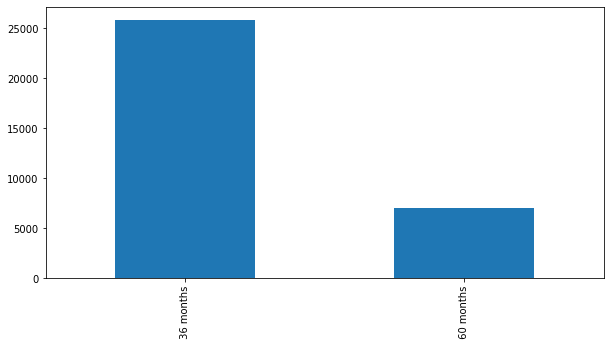

In [406]:
fig = (20,10)
small = (10,5)
loan_dataset_of_defaulters['term'].value_counts().plot(figsize=small,kind='bar')
loan_dataset_of_non_defaulters['term'].value_counts().plot(figsize=small,kind='bar')

# > Analyzing data <

### > Univariate Analysis <

In [407]:
# Global variables required for analysis
big_figure = (20,10)
small_figure = (10,5)
box_figure = (10,10)
box_figure_small = (5,5)

from matplotlib import pyplot

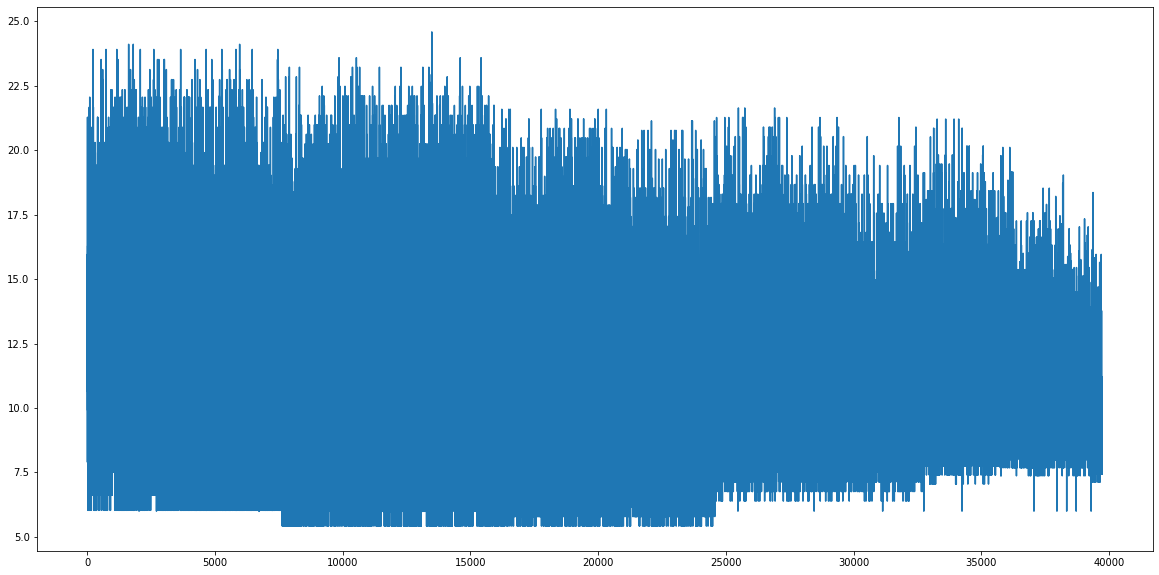

In [408]:
loan_dataset_cleaned['intrest_rate'].plot(figsize=big_figure)

In [409]:
# Cause of the size of data sets line plot on all data or single column does not make much sense

In [410]:
print("Credit Intrest Rate Description")
print("Intrest Median :",loan_dataset_cleaned['intrest_rate'].median())
loan_dataset_cleaned['intrest_rate'].describe(percentiles=[0.25,0.50,0.75,1.0])


def create_box_plots(r,w,columns):
    fig, axes = pyplot.subplots(nrows=r,ncols=w,figsize=box_figure)
    for ax,column in zip(axes,columns):
        loan_dataset_cleaned.boxplot(column=[column],figsize=fig,ax=ax)

Credit Intrest Rate Description
Intrest Median : 11.86


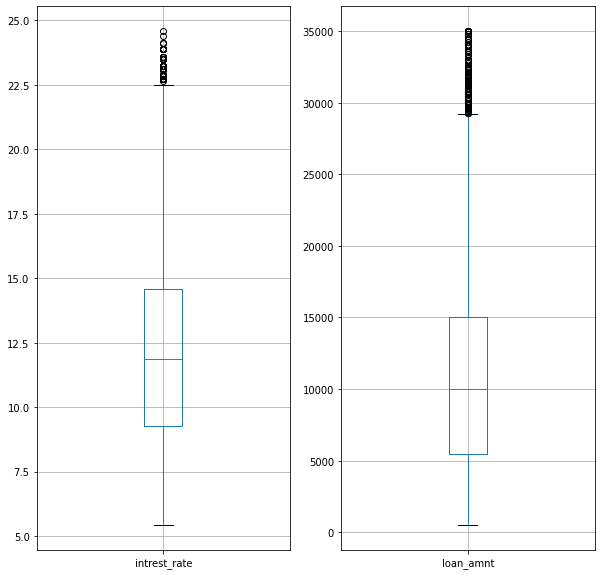

In [411]:
create_box_plots(1,2,['intrest_rate','loan_amnt'])

In [412]:
# Loan Amount 
print("Loan amount ")
print("Median",loan_dataset_cleaned['loan_amnt'].median())
loan_dataset_cleaned['loan_amnt'].describe()

Loan amount 
Median 10000.0


count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

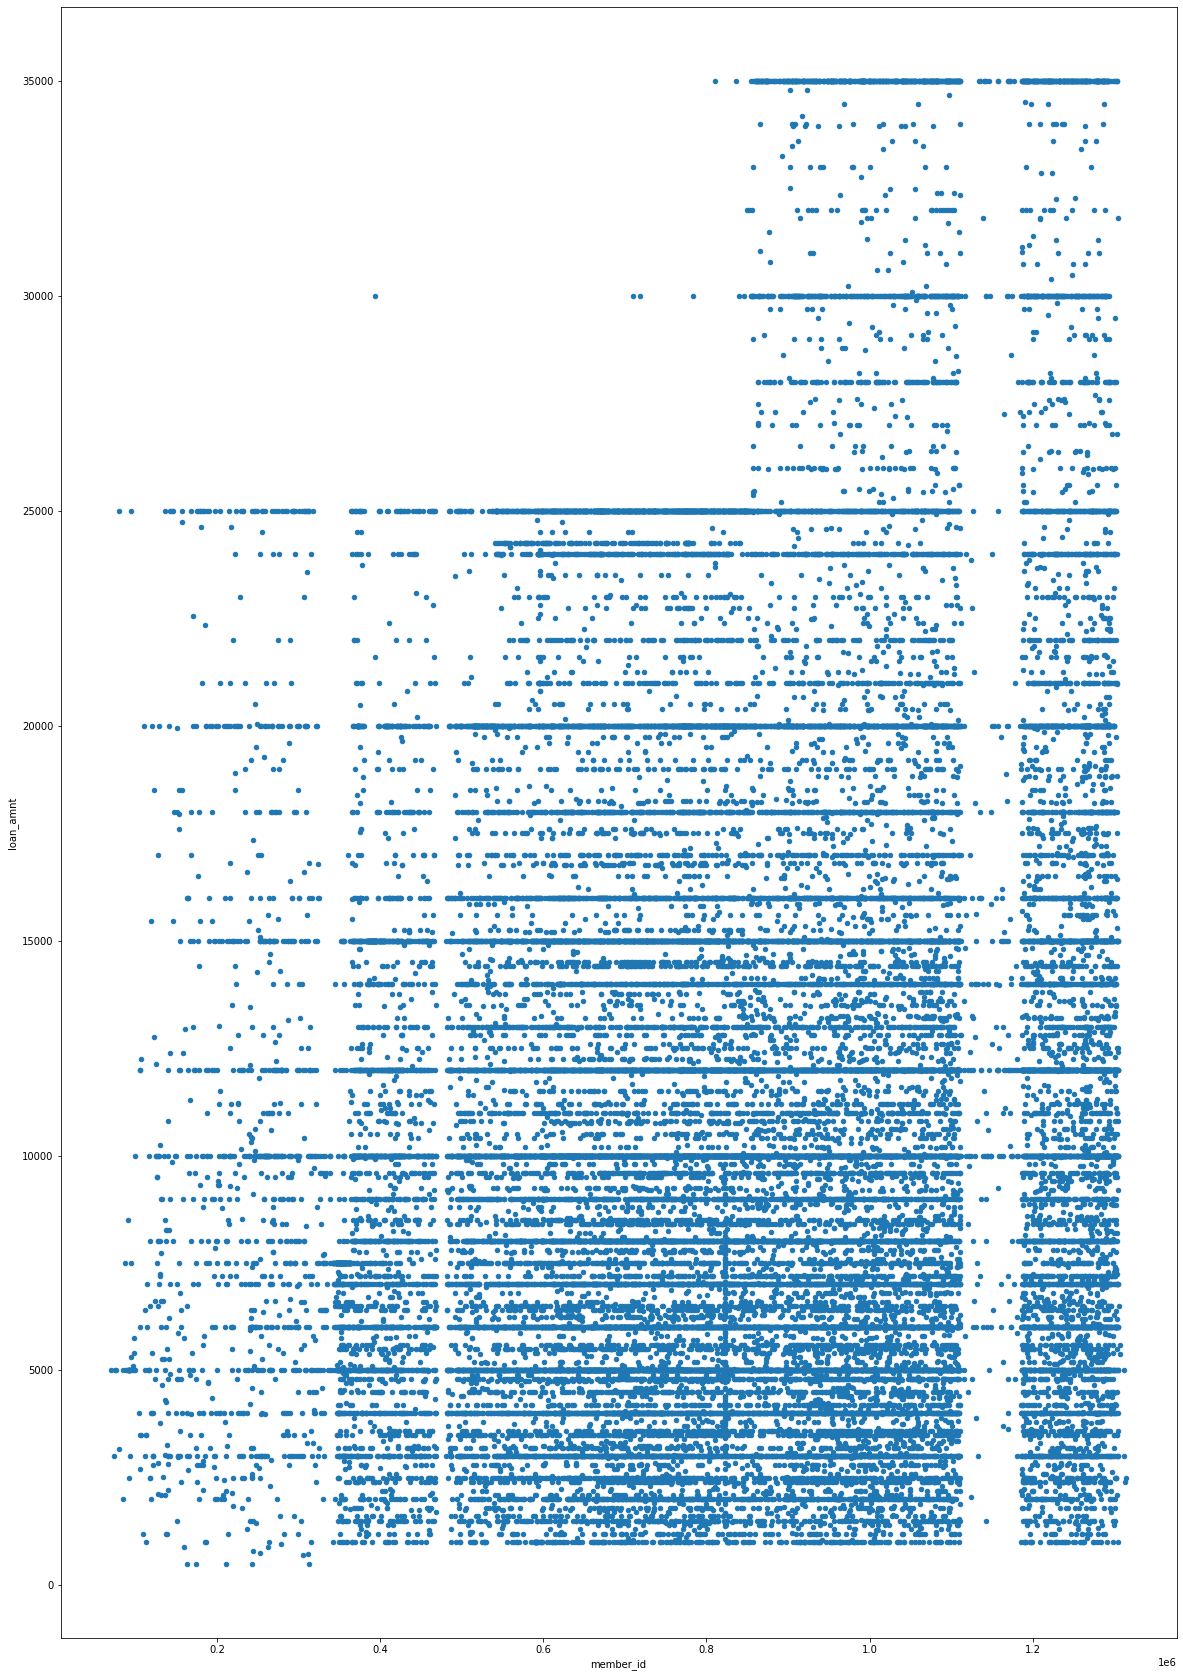

In [413]:
loan_dataset_cleaned.plot.scatter(x="member_id",y="loan_amnt",figsize=(20,30))

In [414]:
# Creating Loan amount buckets 
# Buckets = (0-5000,5000-10000,10000-15000,15000-20000,20000-25000,25000-30000,30000-35000)
def create_buckets(buckets):
    temp = []
    for bucket in buckets:
        pass
        


In [415]:
loan_dataset_cleaned['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Text(0.5, 0, 'Loan status - Current')

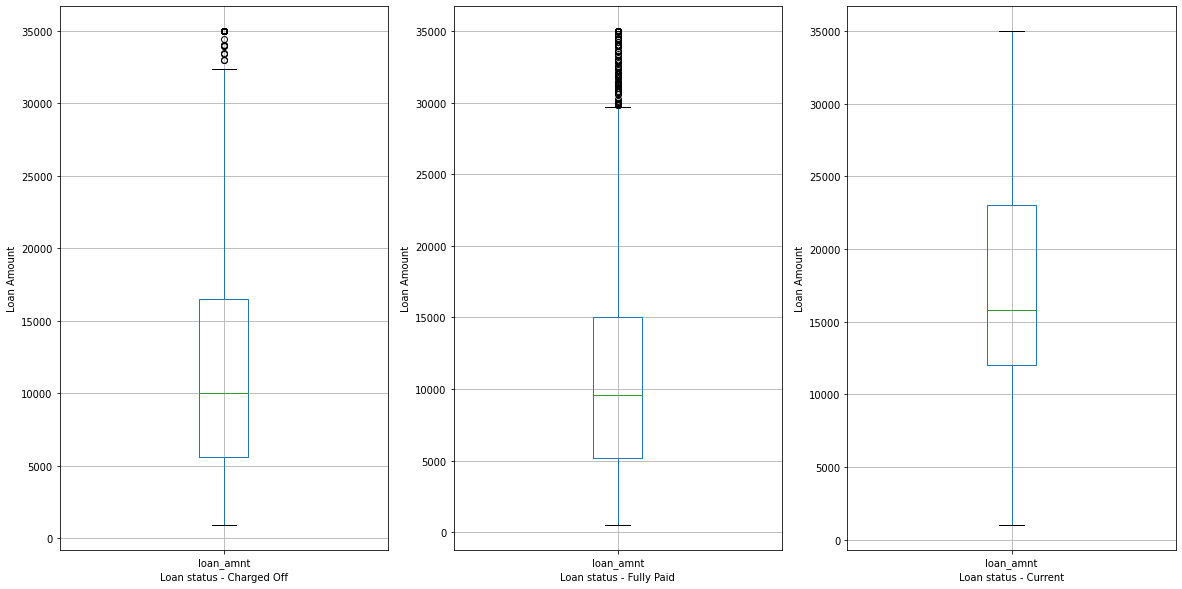

In [439]:
fig, axes = pyplot.subplots(nrows=1,ncols=3,figsize=(20,10))

# box on defaulters
bp = loan_dataset_cleaned[loan_dataset_cleaned['loan_status']=="Charged Off"].boxplot(column=["loan_amnt"],figsize=box_figure_small,ax=axes[0])
bp.set_ylabel("Loan Amount")
bp.set_xlabel("Loan status - Charged Off")

bp = loan_dataset_cleaned[loan_dataset_cleaned['loan_status']=="Fully Paid"].boxplot(column=["loan_amnt"],figsize=box_figure_small,ax=axes[1])
bp.set_ylabel("Loan Amount")
bp.set_xlabel("Loan status - Fully Paid")

bp = loan_dataset_cleaned[loan_dataset_cleaned['loan_status']=="Current"].boxplot(column=["loan_amnt"],figsize=box_figure_small,ax=axes[2])
bp.set_ylabel("Loan Amount")
bp.set_xlabel("Loan status - Current")

In [464]:
d = loan_dataset_cleaned['annual_inc'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,1.0])

In [468]:
loan_dataset_cleaned['annual_inc'].quantile([0.1,0.25,0.5,0.75,0.9,0.95,1.0])

0.10      30000.0
0.25      40404.0
0.50      59000.0
0.75      82300.0
0.90     116000.0
0.95     142000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

ANNUAL INCOME STATS
Median annual income :  59000.0


count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
90%      1.160000e+05
95%      1.420000e+05
100%     6.000000e+06
max      6.000000e+06
Name: annual_inc, dtype: float64


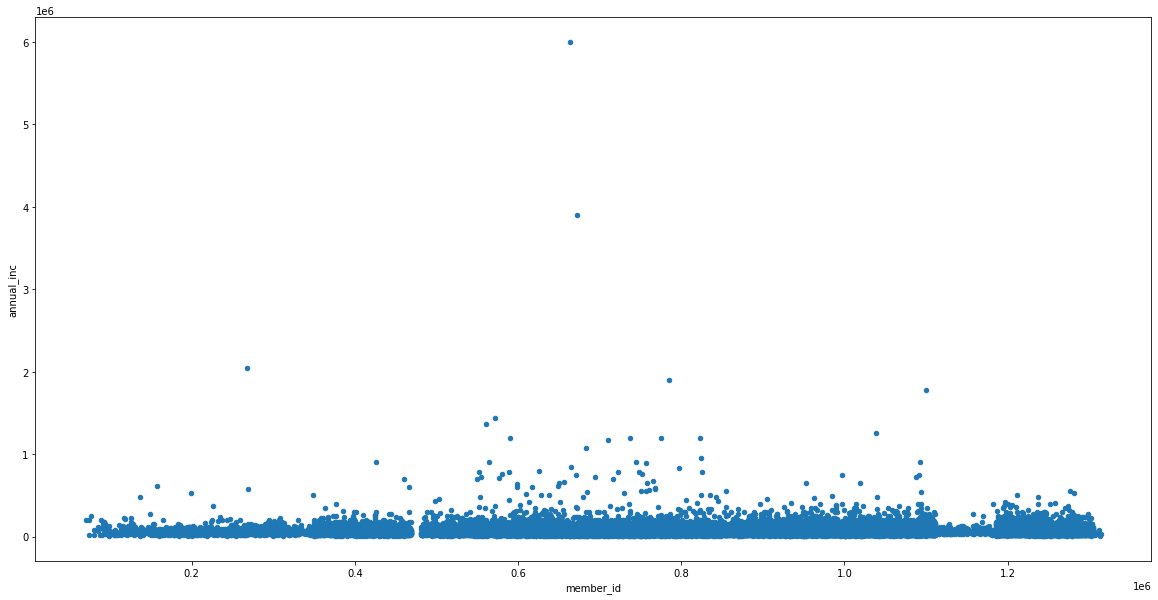

In [469]:
print("ANNUAL INCOME STATS")
print("Median annual income : ",loan_dataset_cleaned['annual_inc'].median())
print("\n")
print(loan_dataset_cleaned['annual_inc'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,1.0]))

# scattering annual income
loan_dataset_cleaned.plot.scatter(x='member_id',y='annual_inc',figsize=(20,10))

Text(0.5, 0, 'member percentiles')

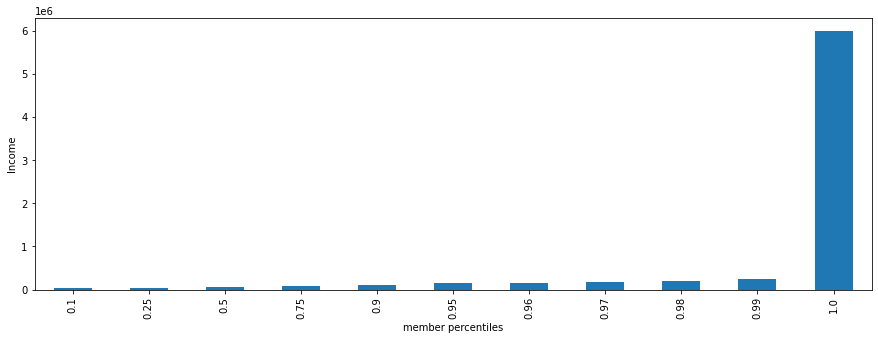

In [480]:
df = loan_dataset_cleaned['annual_inc'].quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.96,0.97,0.98,0.99,1.0])
plot = df.plot(figsize=(15,5),kind='bar')
plot.set_ylabel("Income")
plot.set_xlabel("member percentiles")

In [ ]:
# Above plots clearly indicates top 1% as outliers

ANNUAL INCOME STATS
Median annual income :  59000.0
count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


Text(0.5, 0, 'Loan status - Current')

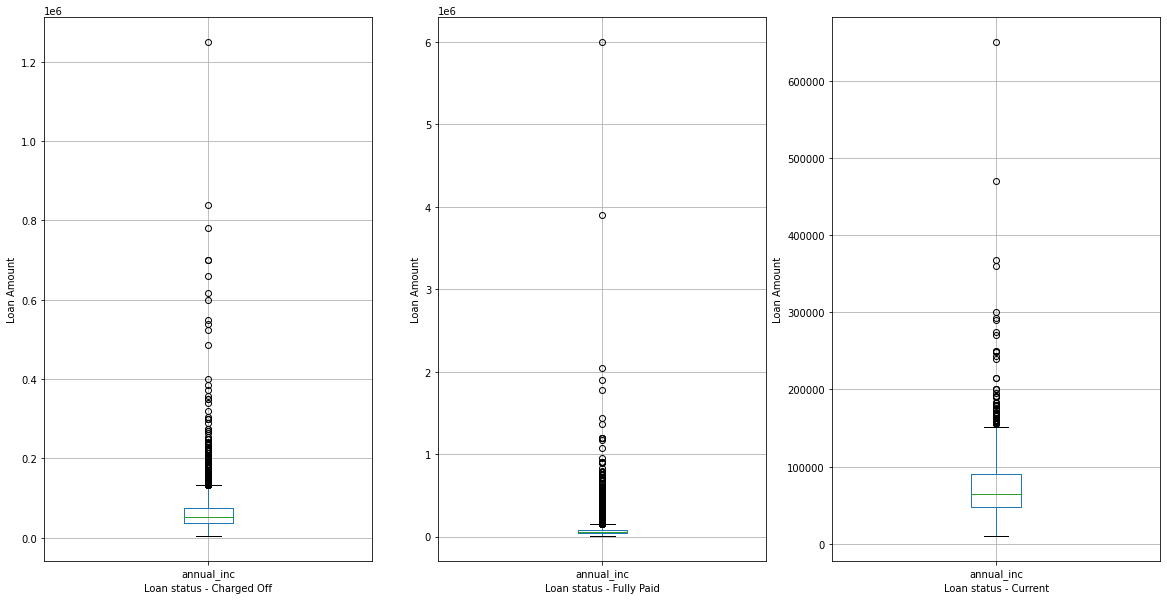

In [443]:
# ANNUAL INCOME ANALYSIS

print("ANNUAL INCOME STATS")
print("Median annual income : ",loan_dataset_cleaned['annual_inc'].median())
print(loan_dataset_cleaned['annual_inc'].describe())

fig, axes = pyplot.subplots(nrows=1,ncols=3,figsize=(20,10))

# box on defaulters
bp = loan_dataset_cleaned[loan_dataset_cleaned['loan_status']=="Charged Off"].boxplot(column=["annual_inc"],figsize=box_figure_small,ax=axes[0])
bp.set_ylabel("Loan Amount")
bp.set_xlabel("Loan status - Charged Off")

bp = loan_dataset_cleaned[loan_dataset_cleaned['loan_status']=="Fully Paid"].boxplot(column=["annual_inc"],figsize=box_figure_small,ax=axes[1])
bp.set_ylabel("Loan Amount")
bp.set_xlabel("Loan status - Fully Paid")

bp = loan_dataset_cleaned[loan_dataset_cleaned['loan_status']=="Current"].boxplot(column=["annual_inc"],figsize=box_figure_small,ax=axes[2])
bp.set_ylabel("Loan Amount")
bp.set_xlabel("Loan status - Current")

In [417]:
loan_dataset_cleaned['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

### > Bivariate Analysis <

In [418]:
# Creating dataset for analyzing term impact on loan_status

In [512]:
# Function for creating segmented frequency map for column for credit defaulters and non-defaulter

def create_frequency_dataset(column_name):
    temp = loan_dataset_of_defaulters[column_name].value_counts().to_dict()
    temp2 = loan_dataset_of_non_defaulters[column_name].value_counts().to_dict() 
    
    if True:
        all_keys = set(temp.keys()).union(set(temp2.keys()))
        defaulter_term_map = [temp.get(key,0) for key in all_keys]
        non_defaulter_term_map = [temp2.get(key,0) for key in all_keys]
    
     #defaulter_term_map = loan_dataset_of_defaulters[column_name].value_counts()
     #non_defaulter_term_map = loan_dataset_of_non_defaulters[column_name].value_counts()
    
    dfratio = []
    avg_amount = []
    median_income = []
    
    print("Index Keys : {}".format(all_keys))
    all_keys = list(all_keys)
    
    for i in range(len(defaulter_term_map)):
        total = defaulter_term_map[i]+non_defaulter_term_map[i]
        per = (defaulter_term_map[i]/total)*100
        dfratio.append(round(per,2))
        
        # Mean Loan
        filtered_df = loan_dataset_cleaned[(loan_dataset_cleaned['loan_status']!="Current")&(loan_dataset_cleaned[column_name]==all_keys[i])]
        avg_amount.append(round(filtered_df['loan_amnt'].mean(),2))
        
        # Median Income
        median_income.append(round(filtered_df['annual_inc'].median(),2))
        
    
        
    data = pd.DataFrame({'Index': list(all_keys),
                         'defaulter(Charged Off)':defaulter_term_map,
                         'non-defaulter(Fully Paid)':non_defaulter_term_map,
                         'defaulter percentage': dfratio,
                         'Average Loan': avg_amount,
                         'Median Annual Income': median_income
                        })
    return data

In [420]:
fmap = create_frequency_dataset("term")
fmap

Index Keys : {' 36 months', ' 60 months'}


,Index,defaulter(Charged Off),non-defaulter(Fully Paid),defaulter percentage,Average Loan
0,36 months,3227,25869,11,9593.0
1,60 months,2400,7081,25,15509.0


In [421]:
k = fmap.set_index('Index')

In [422]:
k

,defaulter(Charged Off),non-defaulter(Fully Paid),defaulter percentage,Average Loan
Index,,,,
36 months,3227,25869,11,9593.0
60 months,2400,7081,25,15509.0


In [518]:
def create_compare_plot(fmap,r=1,c=2,size=big_figure):
    fmap = fmap.set_index('Index')
    fig, axes = pyplot.subplots(nrows=r,ncols=c,figsize=big_figure)
    ax = fmap.plot(y=["defaulter(Charged Off)","non-defaulter(Fully Paid)"],figsize=small,kind='bar',ax=axes[0])
    fmap.plot(y="defaulter percentage",figsize=small,ax=axes[1])
    
    # Creating Space between plots
    pyplot.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
    return 200

def overall_line_compare_plots(fmap):
    fmap = fmap.set_index('Index')
    fmap = fmap.sort_values('defaulter percentage')

    fig, axes = pyplot.subplots(nrows=4,ncols=1,figsize=(40,30))
    fmap.plot(kind="line",figsize=small_figure,y=['defaulter(Charged Off)'],ax=axes[0])
    fmap.plot(kind="line",figsize=small_figure,y=['defaulter percentage'],ax=axes[1])
    fmap.plot(kind="line",figsize=small_figure,y=['Average Loan'],ax=axes[2])
    fmap.plot(kind="line",figsize=small_figure,y=['Median Annual Income'],ax=axes[3])
     # Creating Space between plots
    pyplot.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=1.9, 
                        wspace=0.5, 
                        hspace=0.5)

Loan Term - Loan Status Relationship 
Index Keys : {' 36 months', ' 60 months'}


200

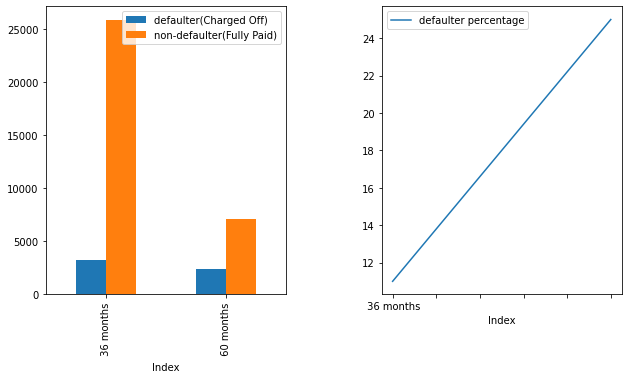

In [424]:
# loan term and loan status plot
print("Loan Term - Loan Status Relationship ")

create_compare_plot(create_frequency_dataset("term"))

In [425]:
print("Verification Status : Frequency Map ")
loan_dataset_cleaned['verification_status'].value_counts()

Verification Status : Frequency Map 


Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [426]:
temp = create_frequency_dataset("verification_status")
temp

Index Keys : {'Not Verified', 'Source Verified', 'Verified'}


,Index,defaulter(Charged Off),non-defaulter(Fully Paid),defaulter percentage,Average Loan
0,Not Verified,2142,14552,13,8387.0
1,Source Verified,1434,8243,15,9971.0
2,Verified,2051,10155,17,15539.0


In [427]:
create_frequency_dataset("verification_status")

Index Keys : {'Not Verified', 'Source Verified', 'Verified'}


,Index,defaulter(Charged Off),non-defaulter(Fully Paid),defaulter percentage,Average Loan
0,Not Verified,2142,14552,13,8387.0
1,Source Verified,1434,8243,15,9971.0
2,Verified,2051,10155,17,15539.0


Income Verification Pivots
Index Keys : {'Not Verified', 'Source Verified', 'Verified'}
Index Keys : {'Not Verified', 'Source Verified', 'Verified'}


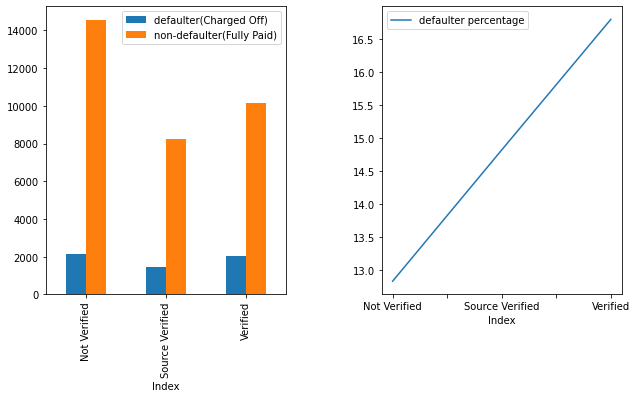

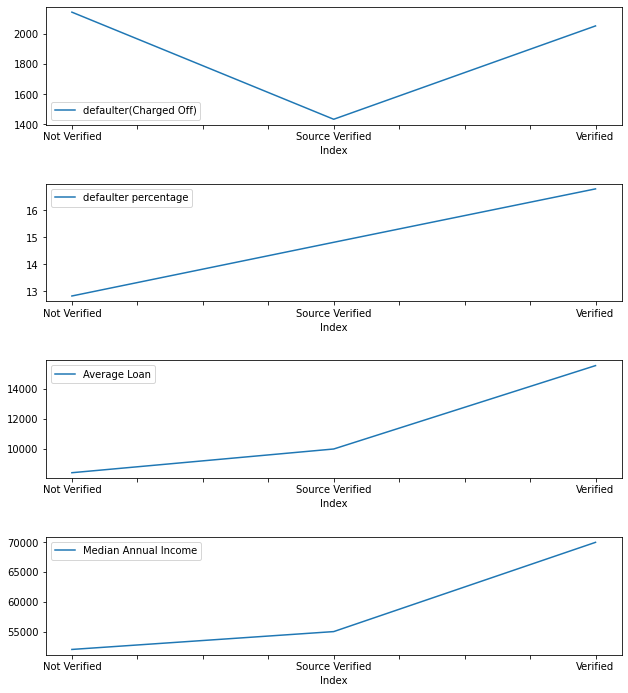

In [521]:
# income verification and loan status plot

print("Income Verification Pivots")
create_compare_plot(create_frequency_dataset("verification_status"))
overall_line_compare_plots(create_frequency_dataset("verification_status"))

In [429]:
loan_dataset_cleaned['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [430]:
loan_dataset_of_defaulters['home_ownership'].value_counts().to_dict().keys()

dict_keys(['RENT', 'MORTGAGE', 'OWN', 'OTHER'])

Home ownership - loan status Relationship
Index Keys : {'RENT', 'OTHER', 'OWN', 'NONE', 'MORTGAGE'}
Index Keys : {'RENT', 'OTHER', 'OWN', 'NONE', 'MORTGAGE'}


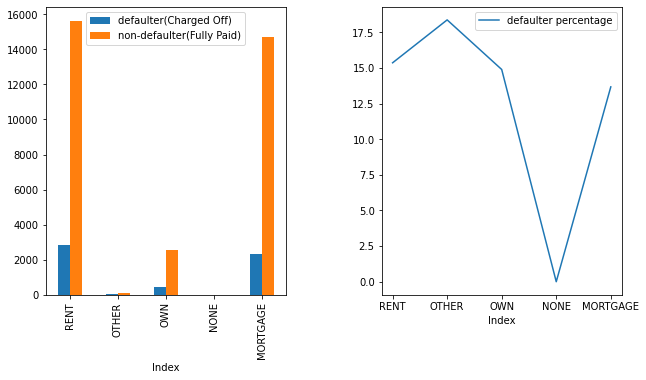

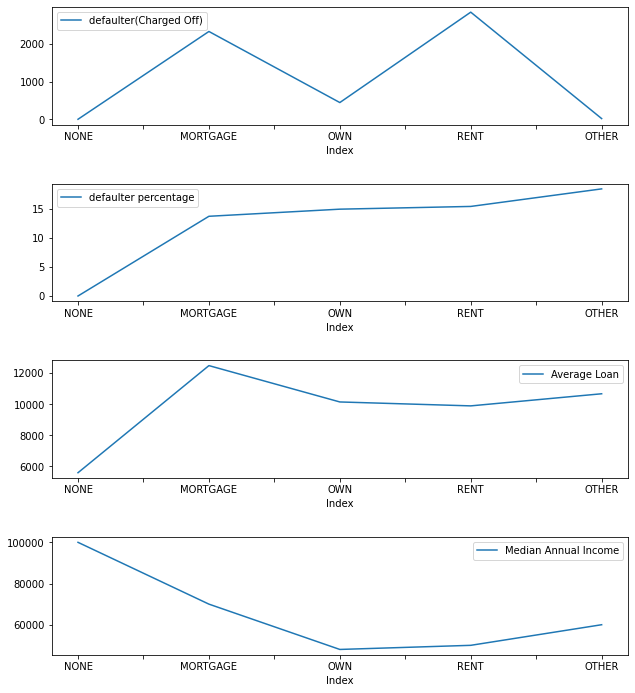

In [520]:
# Home ownership and loan status 
print("Home ownership - loan status Relationship")
create_compare_plot(create_frequency_dataset("home_ownership"))
overall_line_compare_plots(create_frequency_dataset("home_ownership"))

Index Keys : {'NJ', 'MN', 'VA', 'TX', 'CT', 'NY', 'PA', 'AL', 'DC', 'NV', 'IA', 'WI', 'HI', 'TN', 'DE', 'MS', 'WA', 'MI', 'ID', 'OK', 'WY', 'WV', 'RI', 'KS', 'LA', 'SC', 'UT', 'OR', 'AR', 'GA', 'VT', 'SD', 'CO', 'NE', 'ME', 'AK', 'MT', 'NM', 'CA', 'KY', 'FL', 'AZ', 'MO', 'IN', 'NC', 'IL', 'MA', 'NH', 'OH', 'MD'}


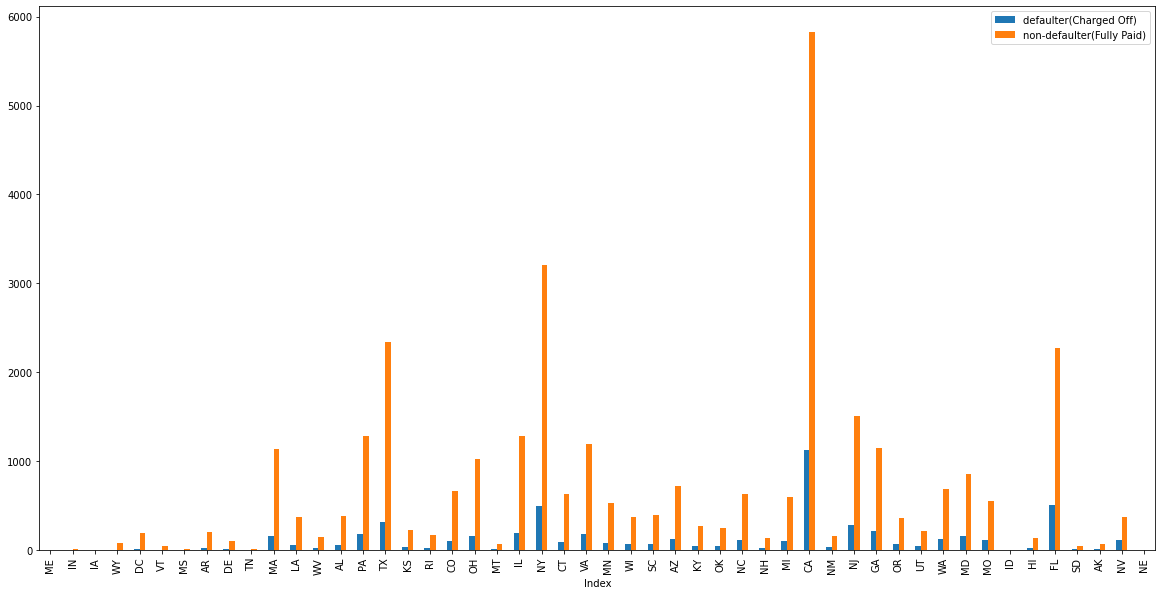

In [432]:
# create_compare_plot(create_frequency_dataset("addr_state"),2,1,(30,30))
fmap = create_frequency_dataset("addr_state")

#sorting dataframe
fmap = fmap.sort_values(by='defaulter percentage')
fmap = fmap.set_index('Index')


# fig, axes = pyplot.subplots(nrows=r,ncols=c,figsize=big_figure)

# Defaulter/non defaulters in every state
ax = fmap.plot(y=["defaulter(Charged Off)","non-defaulter(Fully Paid)"],figsize=(20,10),kind='bar')


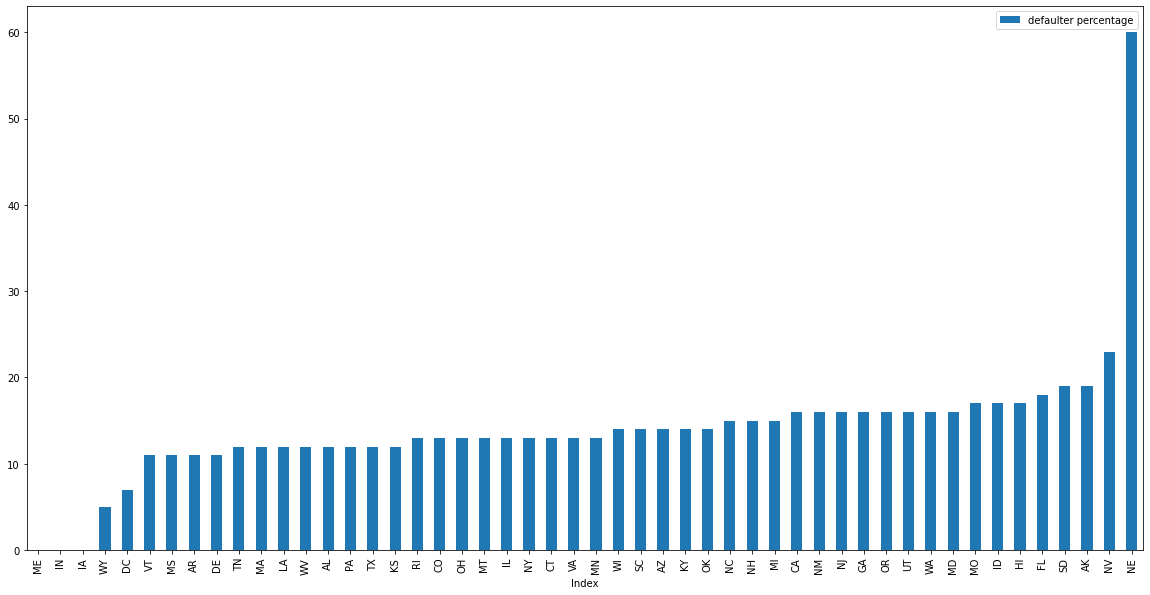

In [433]:
# percentage plot of defaulters in every state
ax = fmap.plot(y="defaulter percentage",figsize=(20,10), kind='bar')

In [483]:
# EMPLOYEMENT LENGTH UNDERSTANDING

print("Employment length, loan  Relationship Dataset")

fmap = create_frequency_dataset("emp_length")
fmap

Employment length, loan  Relationship Dataset
Index Keys : {'< 1 year', '1 year', '9 years', '2 years', '10+ years', '7 years', '8 years', '6 years', '3 years', '4 years', '5 years'}


,Index,defaulter(Charged Off),non-defaulter(Fully Paid),defaulter percentage,Average Loan,Median Annual Income
0,< 1 year,639,3869,14,9572.0,50000.0
1,1 year,456,2713,14,10057.0,51996.0
2,9 years,158,1068,13,11903.0,65000.0
3,2 years,567,3724,13,10125.0,52000.0
4,10+ years,1331,7157,16,12808.0,69740.0
5,7 years,263,1448,15,11565.0,60000.0
6,8 years,203,1232,14,11742.0,60000.0
7,6 years,307,1861,14,11372.0,60000.0
8,3 years,555,3457,14,10637.0,55137.0
9,4 years,462,2880,14,10839.0,57998.0


200

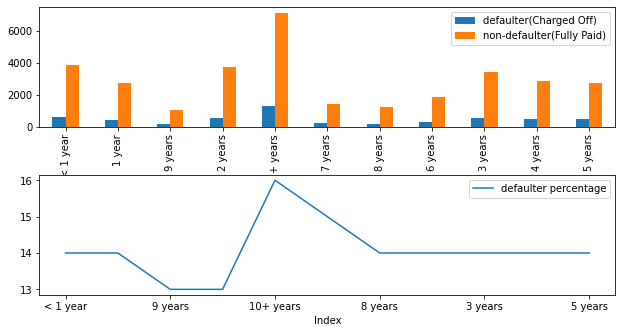

In [435]:
create_compare_plot(fmap,2,1,(10,10))

Index Keys : {'< 1 year', '1 year', '9 years', '2 years', '10+ years', '7 years', '8 years', '6 years', '3 years', '4 years', '5 years'}


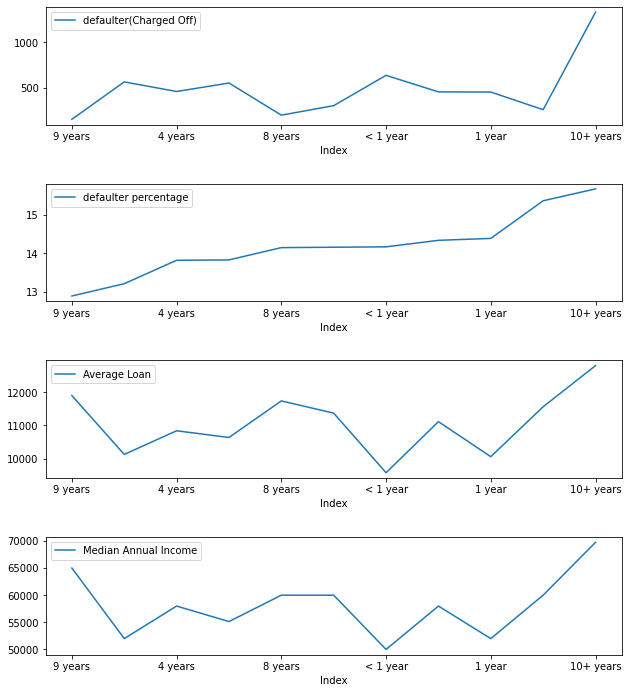

In [519]:
# defaulter to loan average loan

fmap = create_frequency_dataset("emp_length")
overall_line_compare_plots(fmap)

Correlation Map


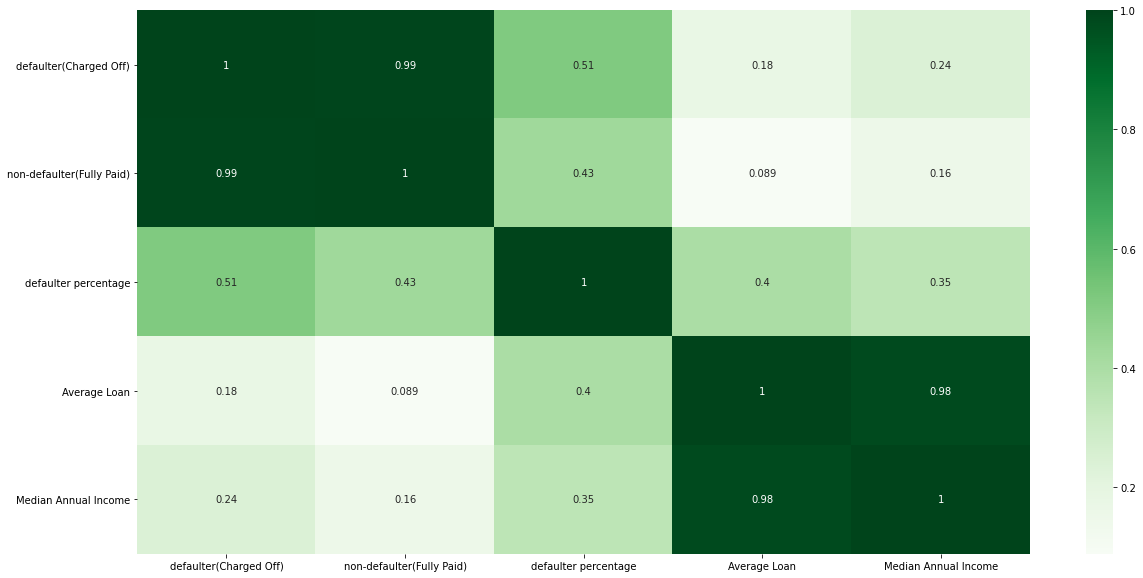

In [514]:
import seaborn

corr_data =fmap.corr()
print("Correlation Map")

fig, ax = pyplot.subplots(figsize=(20,10))
seaborn.heatmap(corr_data,cmap="Greens",ax=ax,annot=True)

In [516]:
corr_data

,defaulter(Charged Off),non-defaulter(Fully Paid),defaulter percentage,Average Loan,Median Annual Income
defaulter(Charged Off),1.000000,0.993255,0.513077,0.179090,0.241591
non-defaulter(Fully Paid),0.993255,1.000000,0.432744,0.088599,0.155559
defaulter percentage,0.513077,0.432744,1.000000,0.398719,0.346975
Average Loan,0.179090,0.088599,0.398719,1.000000,0.980100
Median Annual Income,0.241591,0.155559,0.346975,0.980100,1.000000
